## A1>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
from tqdm import tqdm
from ast import literal_eval
import random
from collections import Counter
import copy
import seaborn as sns
sns.set_style("whitegrid")

## A 2>

In [ ]:
def generate_permut(n,a):
    array = np.arange(1,n+1)
    random_permut = np.random.permutation(array)
    while np.dot(array.T, random_permut) <= a:
        random_permut = np.random.permutation(array)
    return random_permut

def get_frequency(runs, a, n):
    frequency_dict = {}
    for i in range(runs):
        permutation = tuple(generate_permut(n,a))
        if permutation in frequency_dict.keys():
            frequency_dict[permutation] += 1
        else:
            frequency_dict[permutation] = 1
    return frequency_dict    

In [ ]:
p=19

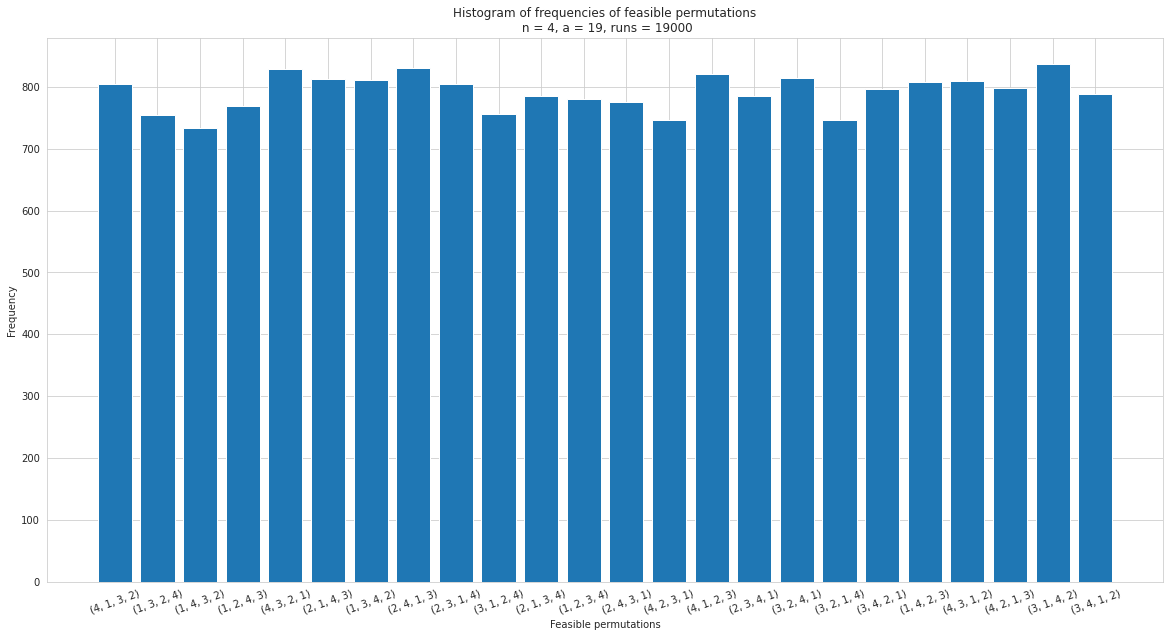

In [ ]:
n = 4
a = 19
runs = 1000*19
reqd_freq = get_frequency(runs,a,n)
plt.figure(figsize = (20,10))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 20)
plt.show()

## Av3>

In [ ]:
def feasible_neighbors_mcmc(permut_state, a, n):
    feasible_neighbors = []
    array = np.arange(1,n+1)
    np.array(permut_state)
    for i in range(len(permut_state)):
        for j in range(len(permut_state)):
            temp = copy.deepcopy(permut_state)
            temp[i], temp[j] = temp[j], temp[i] 
            if ((np.dot(array.T, temp) > a) == True) and ((temp not in feasible_neighbors) == True) and (temp != permut_state):
                feasible_neighbors.append(temp)
    return feasible_neighbors

feasible_neighbors_list = {}
feasible_permutations = reqd_freq.keys()

for state in feasible_permutations:
    feasible_neighbors_list[state] = feasible_neighbors_mcmc(list(state), a, n)    

In [ ]:
print(f"Total number of feasible permutations: {len(feasible_neighbors_list.keys())}")
print()
for key in feasible_neighbors_list.keys():
    print(f"Number of neighbours for the state \033[1m{key}\033[0m: {len(feasible_neighbors_list[key])}")

Total number of feasible permutations: 24

Number of neighbours for the state (1, 2, 4, 3): 6
Number of neighbours for the state (2, 4, 1, 3): 6
Number of neighbours for the state (3, 4, 1, 2): 6
Number of neighbours for the state (1, 3, 4, 2): 6
Number of neighbours for the state (2, 1, 4, 3): 6
Number of neighbours for the state (1, 3, 2, 4): 6
Number of neighbours for the state (4, 3, 1, 2): 6
Number of neighbours for the state (4, 3, 2, 1): 6
Number of neighbours for the state (3, 1, 4, 2): 6
Number of neighbours for the state (1, 4, 2, 3): 6
Number of neighbours for the state (1, 2, 3, 4): 6
Number of neighbours for the state (1, 4, 3, 2): 6
Number of neighbours for the state (2, 1, 3, 4): 6
Number of neighbours for the state (2, 3, 4, 1): 6
Number of neighbours for the state (2, 4, 3, 1): 6
Number of neighbours for the state (3, 2, 4, 1): 6
Number of neighbours for the state (4, 1, 3, 2): 6
Number of neighbours for the state (4, 1, 2, 3): 6
Number of neighbours for the state (3, 

## A 4,5 >

In [ ]:
def mcmc_approach(a, n, iters):
    X_states = []
    X = generate_permut(n, a)
    for i in range(iters):
        nbs = feasible_neighbors_mcmc(list(X), a, n)
        X_next = random.choice(nbs)
        prob = 1/len(nbs)
        nbs_other = feasible_neighbors_mcmc(list(X_next), a, n)
        X_other = random.choice(nbs_other)
        prob_other = 1/len(nbs_other)

        unif = np.random.rand()
        if unif < min(1, prob_other/prob):
            X = X_next
        X_states.append(tuple(X))
    return X_states

In [ ]:
print('a can be ',int(p/2),',',2*p,'and',3*p)

a can be  9 , 38 and 57


In [ ]:
def plotting(a,n):
  X_states =  mcmc_approach(a, n, runs)
  count_dict = Counter(X_states)
  labels = [str(key) for key in count_dict.keys()]
  plt.figure(figsize = (20,10))
  plt.bar(labels, count_dict.values(), align = 'center')
  plt.title(f"MCMC APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
  plt.xlabel("Feasible permutations")
  plt.ylabel("Frequency")
  plt.xticks(labels, rotation = 30)
  plt.show()
  reqd_freq = get_frequency(runs,a,n)
  plt.figure(figsize = (20,10))
  permut_list = [str(key) for key in reqd_freq.keys()]
  plt.bar(permut_list , reqd_freq.values(), align='center')
  plt.title(f"EXACT APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
  plt.xlabel("Feasible permutations")
  plt.ylabel("Frequency")
  plt.xticks(permut_list, rotation = 20)
  plt.show()



for a =  9 n =  8


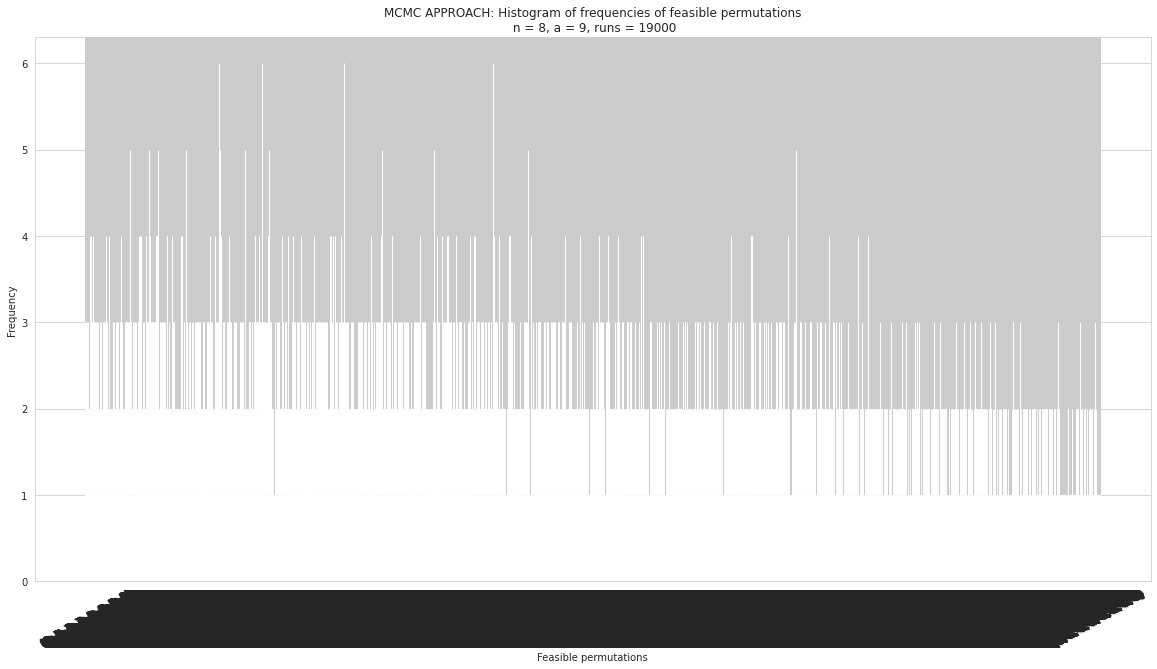

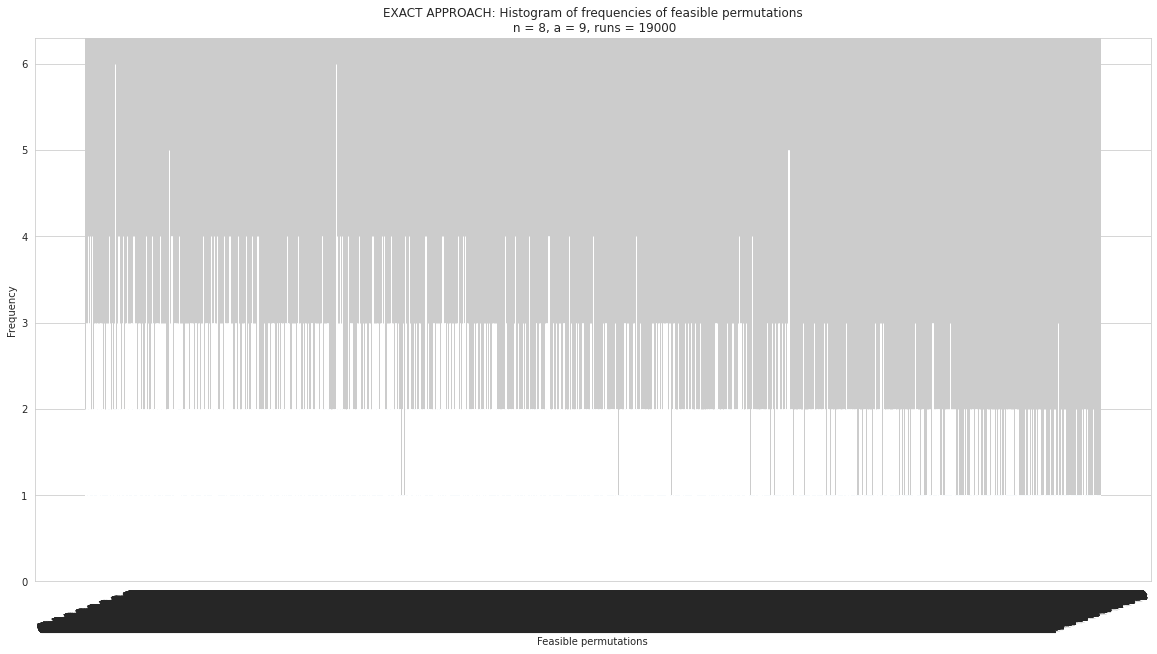

for a =  9 n =  12


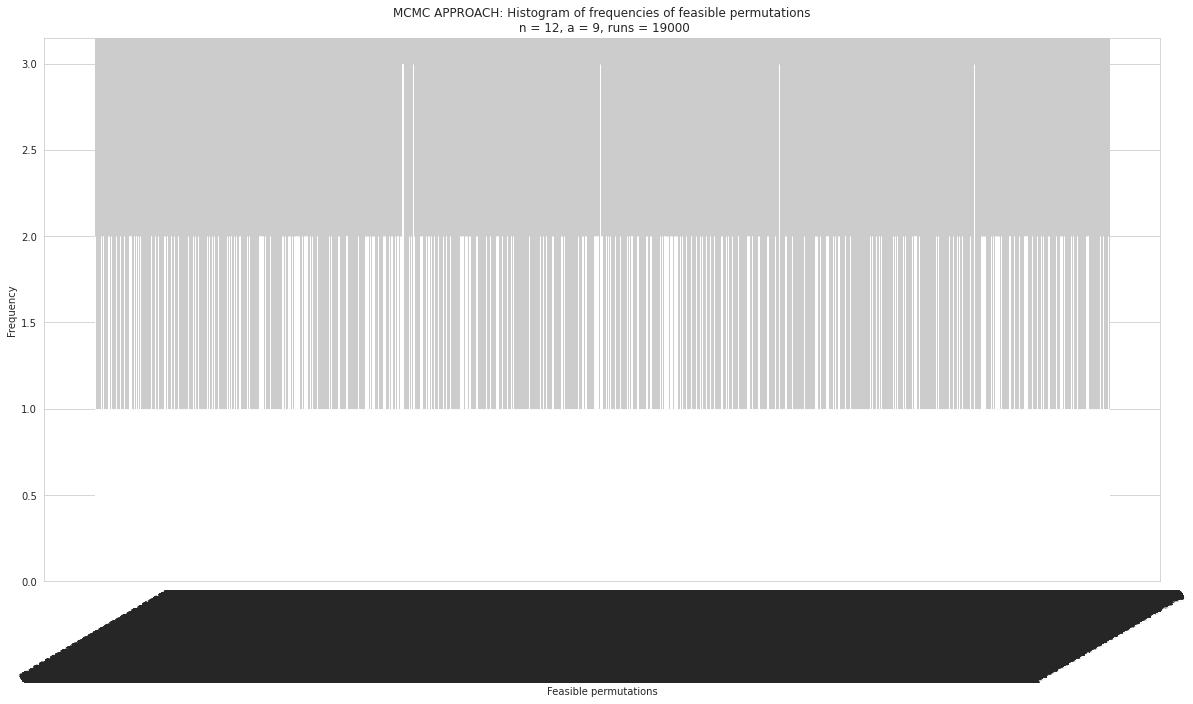

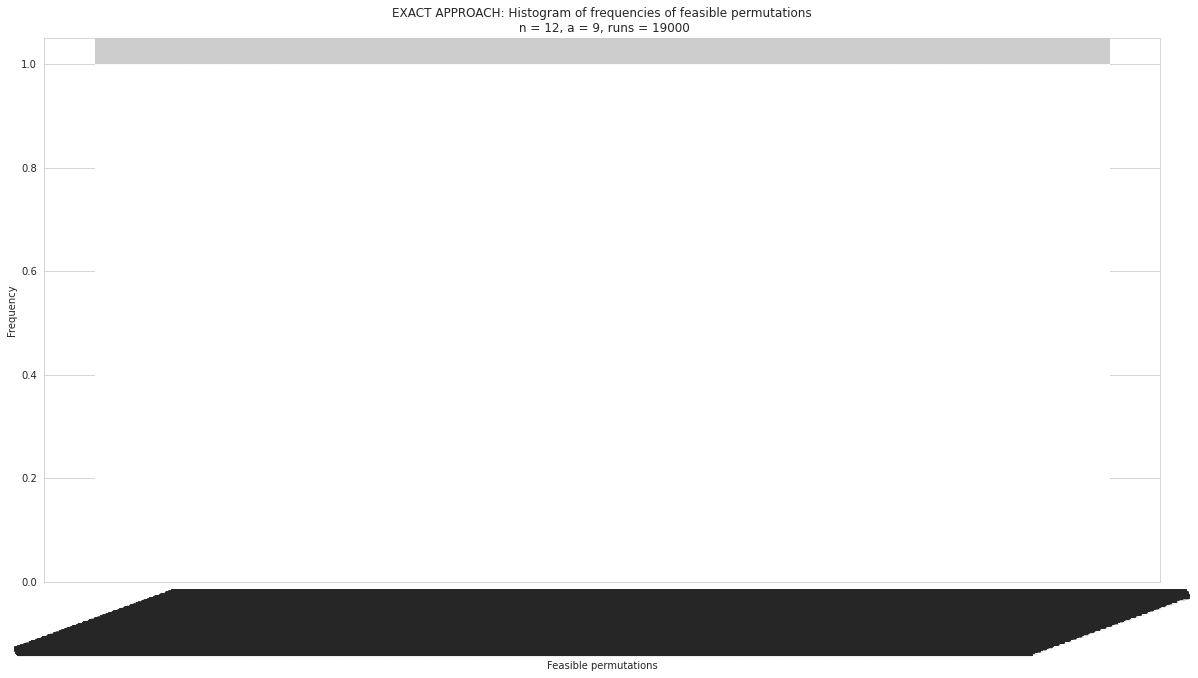

for a =  38 n =  8


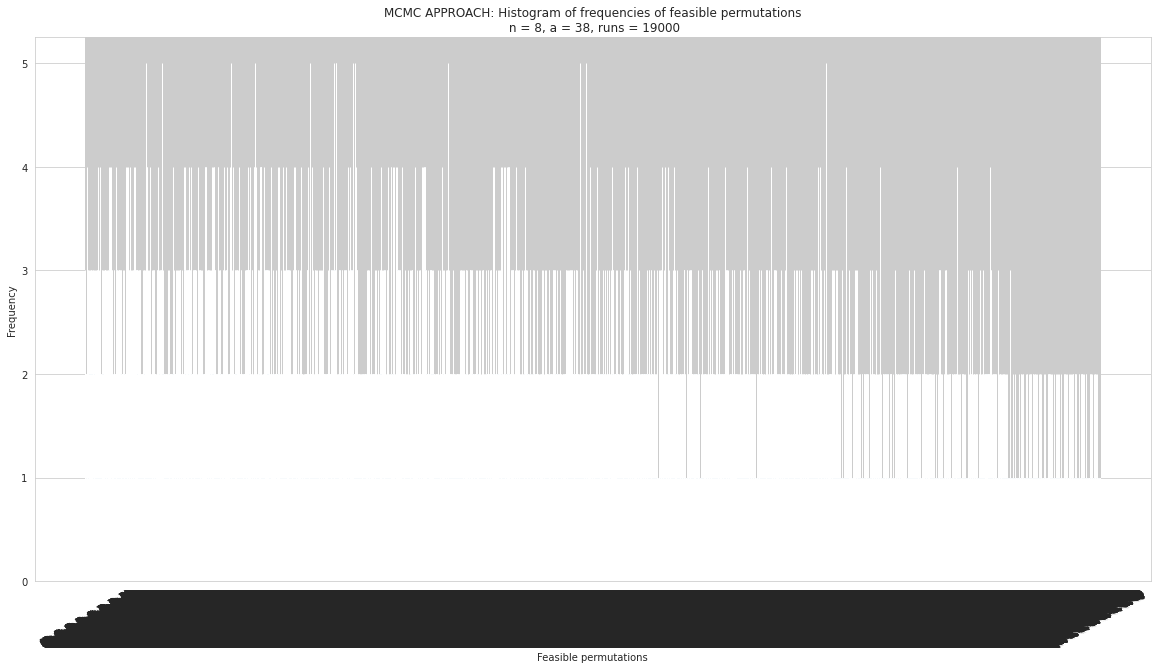

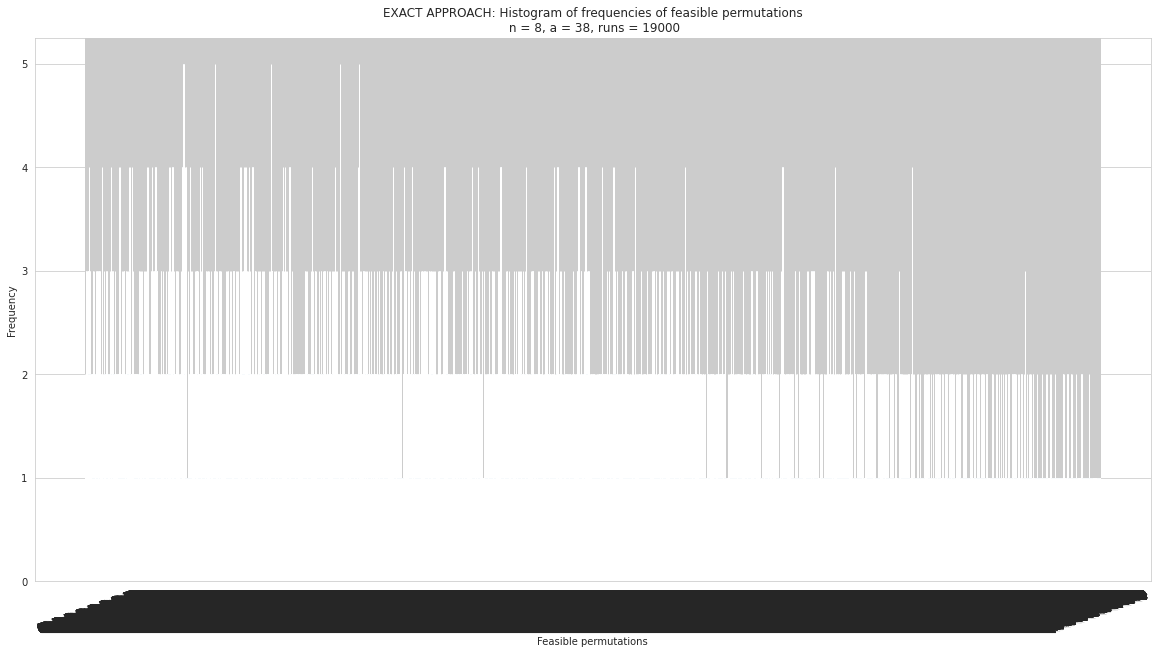

for a =  38 n =  12


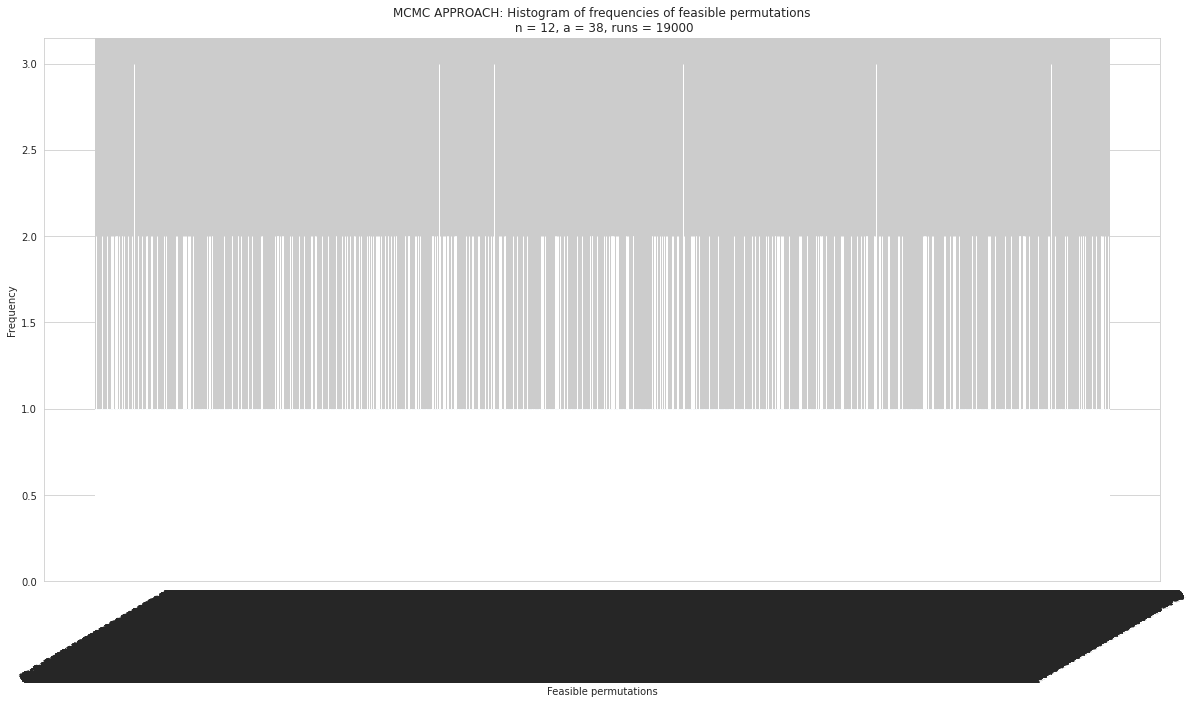

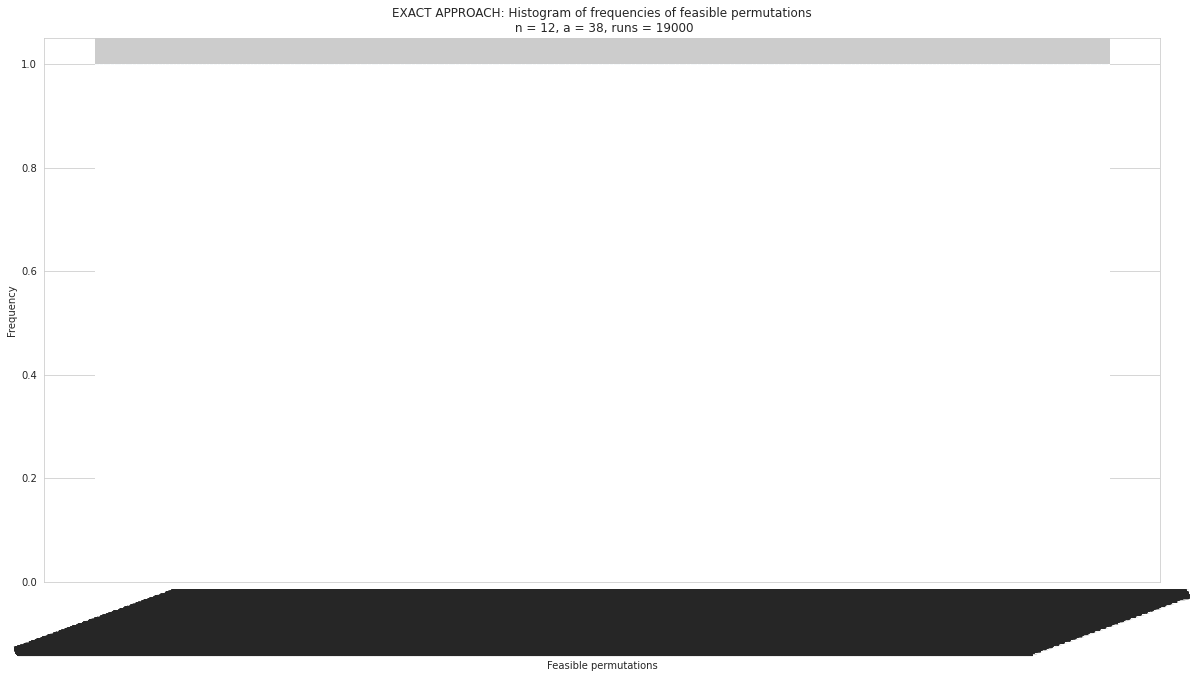

for a =  57 n =  8


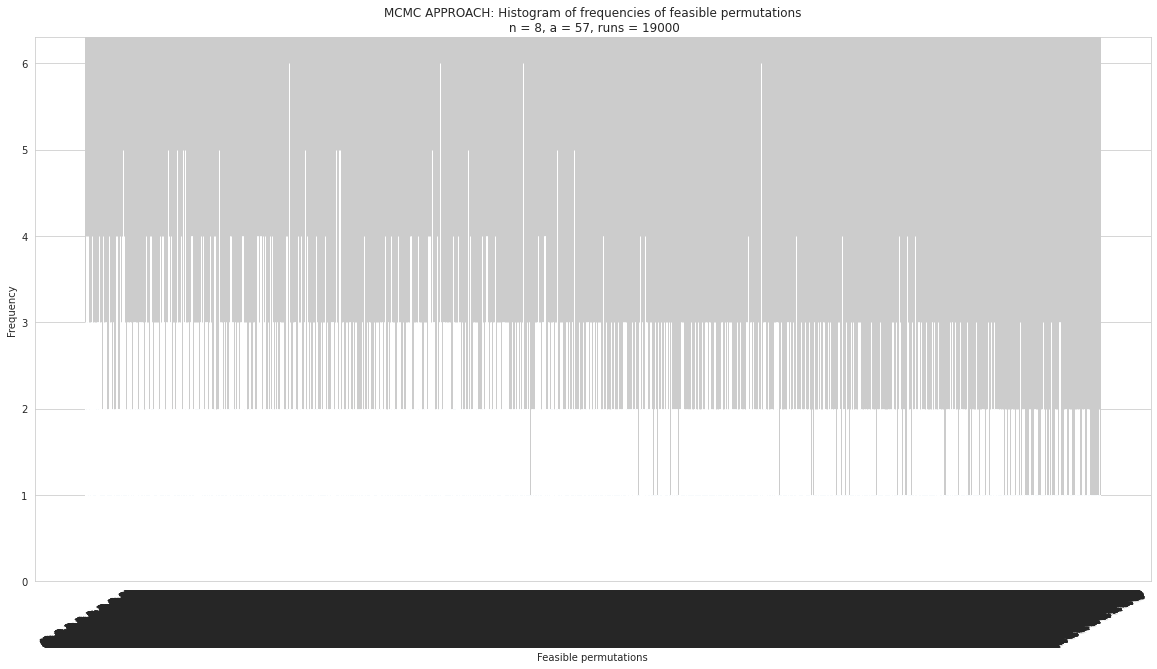

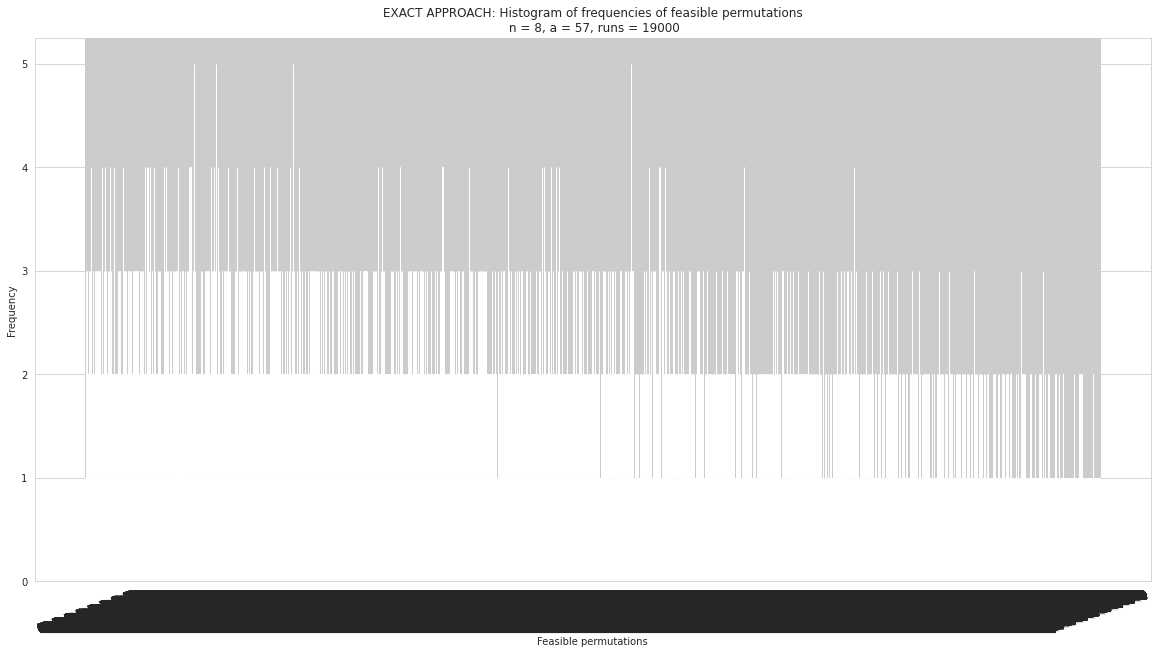

for a =  57 n =  12


KeyboardInterrupt: ignored

In [76]:
for a in [int(p/2),2*p,3*p]:
  for n in [8,12]:
    print('for a = ',a,'n = ',n)
    plotting(a,n)

# **Remaining plot are plotted in below cells.**

In [ ]:
for a in [int(p/2),2*p,3*p]:
    n=2
    print('for a = ',a,'n = ',n)
    plotting(a,n)

In [ ]:
a=57
n=12
print('for a = ',a,'n = ',n)
plotting(a,n)

Rest of the plots taking too much time to run so plots of rest of the plot is not possible in limited time , so I plot which I able to run in limited time.

# Comments

1> We get very similar output for both the exact approach and the MCMC approach.

2> Both the histograms display uniform distribution across the different permutations.

3> For  n=4  and  a=19 , all the 24 permutations come out to be feasible in both the cases

As we increase the value of "a", the number of possible permutations decreases, and as a result, the number of bars in the plots also decreases. However, both approaches yield similar plots, and the feasible permutations are distributed uniformly.


Furthermore, the frequency of feasible permutations changes as "a" increases because the feasible set becomes smaller, and this leads to an increase in the value of "1|P|" (where "P" is the set of feasible permutations). Consequently, the y-axis range of the plots reaches its highest value for the largest "a" value.


Finally, the limit distribution of the Markov chain is uniformly distributed over "P" with a probability of 1 divided by the size of "P"